In [99]:
import pandas as pd

drive_dist = pd.read_csv('Data/drive-dist-PGA25.csv')
fairways_hit = pd.read_csv('Data/fairways-hit-pct-PGA25.csv')
scoring_avg = pd.read_csv('Data/scoring-avg-PGA25.csv')
gir_pct = pd.read_csv('Data/GIR-pct-PGA25.csv')
scramble_pct = pd.read_csv('Data/scramble-pct-PGA25.csv')
putts = pd.read_csv('Data/putts-per-round-PGA25.csv')

# Merge datasets (adjust the key column name as needed)
df = pd.merge(drive_dist, fairways_hit, on='PLAYER_ID', how='left')

merged_df = pd.concat([drive_dist[['PLAYER_ID', 'AVG']], fairways_hit[['PLAYER_ID', '%']]], axis=1)

merged_df = pd.merge(
    drive_dist[['PLAYER_ID', 'AVG', 'PLAYER']].rename(columns={'AVG': 'drive_avg'}),
    fairways_hit[['PLAYER_ID', '%']].rename(columns={'%': 'fairways_pct'}),
    on='PLAYER_ID',
    how='inner'
)

merged_df = pd.merge(
    merged_df,
    gir_pct[['PLAYER_ID', '%']].rename(columns={'%': 'gir_pct'}),
    on='PLAYER_ID',
    how='inner'
)

merged_df = pd.merge(
    merged_df,
    scramble_pct[['PLAYER_ID', '%']].rename(columns={'%': 'scramble_pct'}),
    on='PLAYER_ID',
    how='inner'
)

merged_df = pd.merge(
    merged_df,
    putts[['PLAYER_ID', 'AVG']].rename(columns={'AVG': 'putts_avg'}),
    on='PLAYER_ID',
    how='inner'
)

merged_df = pd.merge(
    merged_df,
    scoring_avg[['PLAYER_ID', 'AVG']].rename(columns={'AVG': 'scoring_avg'}),
    on='PLAYER_ID',
    how='inner'
)

# Assuming the scoring column is named 'SCORING_AVG' (adjust if needed)
merged_df = merged_df.sort_values(by='scoring_avg', ascending=True)
print(merged_df)





     PLAYER_ID  drive_avg             PLAYER fairways_pct gir_pct  \
78       46046      302.0  Scottie Scheffler       65.31%  71.45%   
2        28237      317.5       Rory McIlroy       51.81%  67.13%   
65       34021      303.8         Bud Cauley       56.36%  67.96%   
137      49960      295.6        Sepp Straka       67.27%  72.10%   
82       33968      301.4   Thorbjørn Olesen       61.57%  68.89%   
..         ...        ...                ...          ...     ...   
127      39977      297.0           Max Homa       56.48%  60.70%   
91       32070      300.6      Rafael Campos       50.65%  60.43%   
160      45523      292.8  Thriston Lawrence       61.19%  62.88%   
132      34466      296.9      Peter Malnati       47.22%  57.58%   
144      23320      294.8        Ryan Palmer       54.58%  60.26%   

    scramble_pct  putts_avg  scoring_avg  
78        71.35%      28.08       69.019  
2         69.01%      27.96       69.163  
65        65.90%      28.40       70.014  

In [100]:
# Change percentages to floats for data analysis
merged_df['fairways_pct'] = merged_df['fairways_pct'].str.rstrip('%').astype(float)
merged_df['gir_pct'] = merged_df['gir_pct'].str.rstrip('%').astype(float)
merged_df['scramble_pct'] = merged_df['scramble_pct'].str.rstrip('%').astype(float)


In [101]:
print(merged_df[['scoring_avg', 'drive_avg', 'fairways_pct', 'gir_pct', 'scramble_pct', 'putts_avg' ]].describe())

       scoring_avg   drive_avg  fairways_pct     gir_pct  scramble_pct  \
count   185.000000  185.000000    185.000000  185.000000    185.000000   
mean     71.332432  300.458919     57.873189   65.860486     60.954108   
std       0.709698    7.896473      5.396965    2.971631      4.110596   
min      69.019000  275.400000     42.210000   57.580000     49.180000   
25%      70.904000  295.500000     54.070000   63.800000     58.500000   
50%      71.227000  300.500000     57.840000   66.070000     61.060000   
75%      71.674000  305.400000     61.460000   67.960000     63.730000   
max      73.405000  323.900000     72.840000   73.380000     71.350000   

        putts_avg  
count  185.000000  
mean    28.698595  
std      0.563622  
min     27.490000  
25%     28.290000  
50%     28.680000  
75%     29.100000  
max     30.500000  


In [102]:
grouped = merged_df.groupby('scoring_avg')[['drive_avg', 'fairways_pct', 'gir_pct', 'scramble_pct', 'putts_avg']].mean()

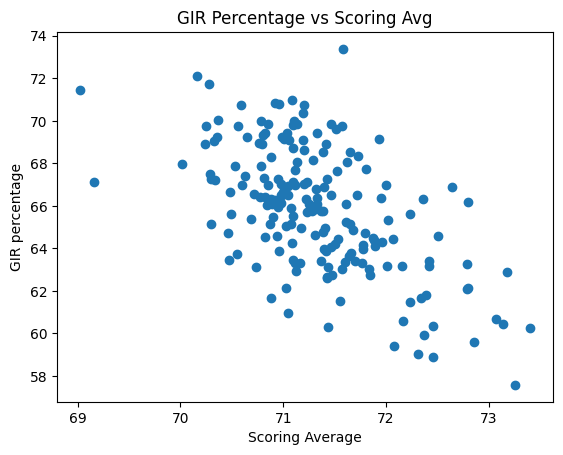

In [103]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['scoring_avg'], merged_df['gir_pct'])
plt.xlabel('Scoring Average')
plt.ylabel('GIR percentage')
plt.title('GIR Percentage vs Scoring Avg')
plt.show()


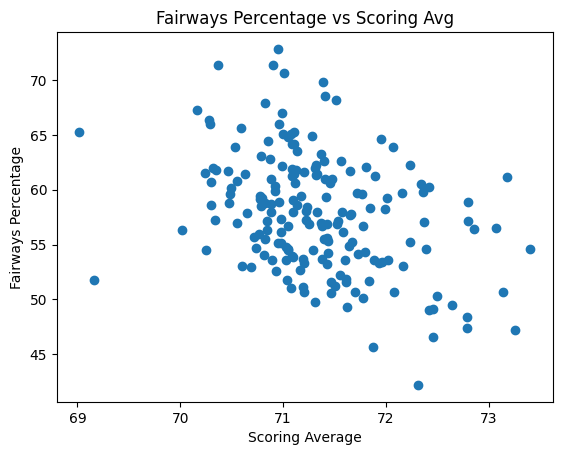

In [104]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['scoring_avg'], merged_df['fairways_pct'])
plt.xlabel('Scoring Average')
plt.ylabel('Fairways Percentage')
plt.title('Fairways Percentage vs Scoring Avg')
plt.show()


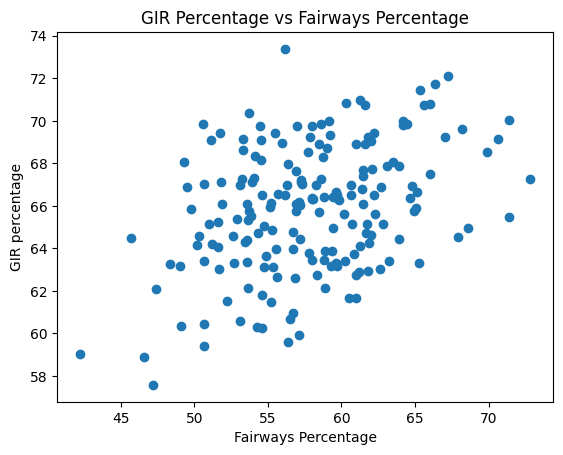

In [105]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['fairways_pct'], merged_df['gir_pct'])
plt.xlabel('Fairways Percentage')
plt.ylabel('GIR percentage')
plt.title('GIR Percentage vs Fairways Percentage')
plt.show()


In [106]:
correlations = merged_df.corr(numeric_only=True)
print(correlations['scoring_avg'].sort_values())


gir_pct        -0.584877
scramble_pct   -0.496924
fairways_pct   -0.374872
drive_avg      -0.116542
PLAYER_ID       0.081505
putts_avg       0.200146
scoring_avg     1.000000
Name: scoring_avg, dtype: float64


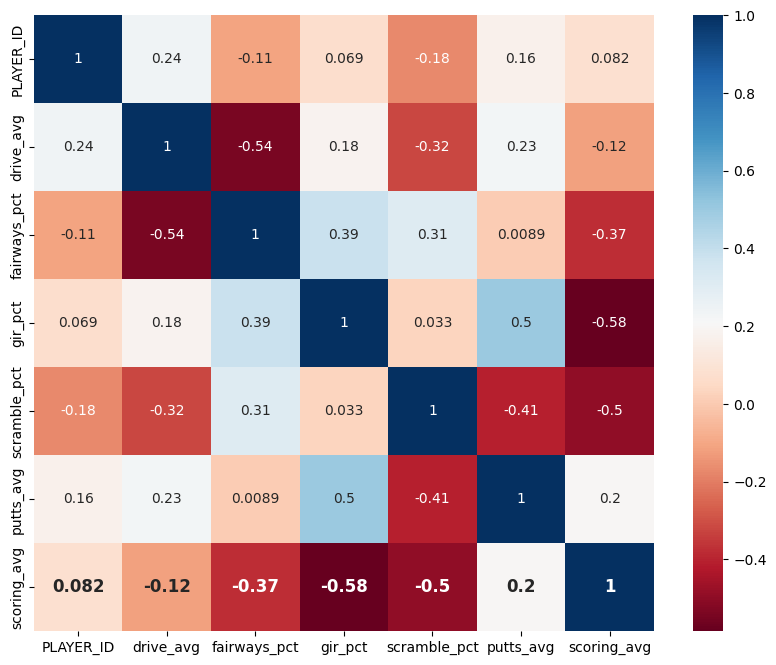

In [107]:
import seaborn as sns
plt.figure(figsize=(10, 8))

ax = sns.heatmap(correlations, cmap='RdBu', annot=True)

for text in ax.texts:
    # text.get_position() returns (x, y)
    x, y = text.get_position()
    # Get the row label for current y position
    row_label = correlations.index[int(y)]
    
    if row_label == 'scoring_avg':
        text.set_fontweight('bold')
        text.set_size(12)

plt.show()

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Define input features (X) and target (y)
X = data.drop(columns=['scoring_avg'])
y = data['scoring_avg']

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [118]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


MAE: 0.267
RMSE: 0.340
R²: 0.709


In [119]:
# Match coefficients to their features
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values(ascending=False))


putts_avg       0.603110
PLAYER_ID       0.000003
fairways_pct   -0.020125
drive_avg      -0.025073
scramble_pct   -0.052420
gir_pct        -0.167287
dtype: float64


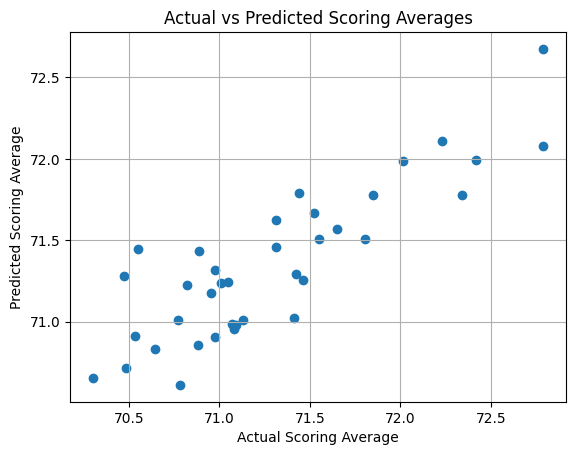

In [120]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scoring Average")
plt.ylabel("Predicted Scoring Average")
plt.title("Actual vs Predicted Scoring Averages")
plt.grid(True)
plt.show()


In [114]:
# print(merged_df)
data = merged_df.drop(columns=['PLAYER_ID'])
data = merged_df.drop(columns=['PLAYER'])
print(data)

     PLAYER_ID  drive_avg  fairways_pct  gir_pct  scramble_pct  putts_avg  \
78       46046      302.0         65.31    71.45         71.35      28.08   
2        28237      317.5         51.81    67.13         69.01      27.96   
65       34021      303.8         56.36    67.96         65.90      28.40   
137      49960      295.6         67.27    72.10         60.63      28.41   
82       33968      301.4         61.57    68.89         62.50      29.00   
..         ...        ...           ...      ...           ...        ...   
127      39977      297.0         56.48    60.70         61.78      28.30   
91       32070      300.6         50.65    60.43         54.11      28.68   
160      45523      292.8         61.19    62.88         53.74      29.86   
132      34466      296.9         47.22    57.58         60.71      28.33   
144      23320      294.8         54.58    60.26         55.38      28.73   

     scoring_avg  
78        69.019  
2         69.163  
65        70.014  

So far I've been able to predict a PGA tour players average score based on their statistics

This alone doesn't give me much of anything. Any player that has all of these advanced stats can very easily calculate their actual scoring average. To make usefull predictions I will want to see what changes would result in the biggest scoring differences among tour players. Ideally, I would be able to do this with any player including myself, but I don't have enough training data for that I'm afraid.

After I'm able to use the model to predict scoring changes with game improvements for tour players, I will then take on the challenge of using a model to do the same with any player. This would need to include new data and perhaps new attributes.

Questions to answer:
1. How will I determine how much to change each stat by?
2. Should I change multiple attributes at once?
3. How will I collect High Handicap Data?
4. How can I narrate the data in a way that doesn't over generalize?
5. How can I use the data to optimize my training.

** Stats to track for my game

After my last golf round I realized how I will need to change the stats that I'm tracking to build a model for myself and other high handicap golfers

The first stat that will need to go or at least get modified is fairways hit for two reasons. The first reason being that missing the fairway alone isn't what makes my score higher. Missing the fairway only hurts my game when I miss in a spot that gives me a bad lie or no line to the hole. A stat that would keep track of how many times this happens would better track how my tee shot is affecting my score.

The second stat I want to start tracking is GIR+1 (how many times I'm able to get on the gree in an extra shot). This would let me know how many par putts I get in a round, and would be my equivelent to GIR for a scratch golfer since my handicap is over 18. Since a bogey is a good score for me, knowing this stat would give me a good idea of whether I should focus from tee to green or my putting.

It may also make sense to change the way I track my scrambling percentage. Instead of just tracking the amount of times I'm able to save par or better, I will track the amount of times I'm able to save bogey or better when missing the GIR+1. The idea behind seeing my scramble percentage is to see if I'm able to get up and down when I'm within about 10 yards of the green, although it may also be usefull to keep a stat that will track if I can get it in the hole within 3 strokes when I'm inside a cutoff distance like 80 yards.

My driving distance and putts per round can be tracked just the same as the pros. Driving distance will require dilligance of tracking each of my tee shots during my rounds. One more question to answer is whether or not I want to keep stats on my average drive with my driving irons off the tee.